In [65]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from random import random
import seaborn as sns
import numpy as np

Load Tn-seq data:

In [4]:
path_data = '../../data/'
df_data = pd.read_excel(os.path.join(path_data, 'Tn_library_DB_qval_log2FC.xlsx'))

for col in df_data.columns:
    print(col)

Rv_ID
gene_name
2003A_Sassetti_q_val
2003A_Sassetti_log2FC
2003B_Sassetti_q_val
2003B_Sassetti_log2FC
2005_Rengarajan_q_val
2005_Rengarajan_log2FC
2006_Joshi_GI_1_q_val
2006_Joshi_GI_1_log2FC
2006_Joshi_GI_2_q_val
2006_Joshi_GI_2_log2FC
2011_Griffin_2_q_val
2011_Griffin_2_log2FC
2013_Zhang_1_q_val
2013_Zhang_1_log2FC
2013_Zhang_2_q_val
2013_Zhang_2_log2FC
2013_Zhang_3A_q_val
2013_Zhang_3A_log2FC
2013_Zhang_3B_q_val
2013_Zhang_3B_log2FC
2013_Zhang_3C_q_val
2013_Zhang_3C_log2FC
2013_Zhang_3D_q_val
2013_Zhang_3D_log2FC
2016_Korte_q_val
2016_Korte_log2FC
2017_Mishra_1A_q_val
2017_Mishra_1A_log2FC
2017_Mishra_1B_q_val
2017_Mishra_1B_log2FC
2017_Mishra_1C_q_val
2017_Mishra_1C_log2FC
2017_Mishra_1D_q_val
2017_Mishra_1D_log2FC
2018_Rittershaus_1A_q_val
2018_Rittershaus_1A_log2FC
2018_Rittershaus_1B_q_val
2018_Rittershaus_1B_log2FC
2012_Zhang_q_val
2012_Zhang_log2FC
2015_Kieser_GI_1_q_val
2015_Kieser_GI_1_log2FC
2015_Kieser_GI_2_q_val
2015_Kieser_GI_2_log2FC
2015_Kieser_GI_3_q_val
2015_Kieser_G

Load unknown score data:

In [6]:
df_uk = pd.read_csv(os.path.join(path_data, 'unknown_essentials/unknown_ALL_levels_essential_scores.csv'))
df_uk = df_uk[['Rv_ID', 'gene_name', 'UK_score_4']]
df_uk.head()

,Rv_ID,gene_name,UK_score_4
0,Rv0001,dnaA,0.0
1,Rv3582c,ispD,1.0
2,Rv0510,hemC,0.0
3,Rv0509,hemA,0.0
4,Rv0500,proC,0.0


Choose what dataset you're going to work with: 

In [7]:
df_data_test = df_data[['Rv_ID', 'gene_name', '2017_Xu_1A_q_val', '2017_Xu_1A_log2FC']]
df_data_test.head()

,Rv_ID,gene_name,2017_Xu_1A_q_val,2017_Xu_1A_log2FC
0,Rv0001,dnaA,1.0,0.000000
1,Rv0002,dnaN,1.0,0.000000
2,Rv0003,recF,1.0,-0.535596
3,Rv0004,-,1.0,0.000000
4,Rv0005,gyrB,1.0,0.000000


Discretize the q-values: 

In [8]:
def discretize_q_values(row):
    q_val = row['2017_Xu_1A_q_val']
    if q_val < 0.01:
        q_val_d = 3
    elif q_val < 0.05:
        q_val_d = 2
    else:
        q_val_d = 1
    return q_val_d

In [9]:
df_data_test['q_val_D'] = df_data_test.apply(discretize_q_values, 1)

/Users/ajinich/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_vis = df_data_test.merge(df_uk, on = ['Rv_ID', 'gene_name'], how = 'inner')
df_vis.head()

,Rv_ID,gene_name,2017_Xu_1A_q_val,2017_Xu_1A_log2FC,q_val_D,UK_score_4
0,Rv0001,dnaA,1.0,0.000000,1,0.0
1,Rv0002,dnaN,1.0,0.000000,1,0.0
2,Rv0003,recF,1.0,-0.535596,1,0.0
3,Rv0004,-,1.0,0.000000,1,4.0
4,Rv0005,gyrB,1.0,0.000000,1,0.0


/Users/ajinich/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ajinich/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([   5.,    6.,    8.,   37.,   23.,   77.,  535., 3222.,   49.,
           9.]),
 array([-6.97039354, -5.99680071, -5.02320788, -4.04961505, -3.07602222,
        -2.1024294 , -1.12883657, -0.15524374,  0.81834909,  1.79194192,
         2.76553475]),
 <a list of 10 Patch objects>)

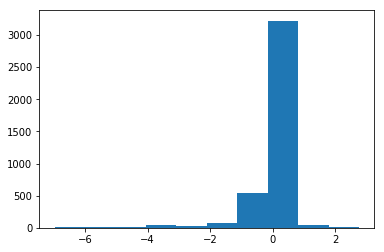

In [12]:
plt.hist(df_vis['2017_Xu_1A_log2FC'])

In [84]:
uk_list = df_vis.UK_score_4
q_list = df_vis.q_val_D
rad = 400*(df_vis['2017_Xu_1A_log2FC'].abs() + 1)

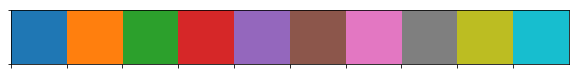

In [85]:
current_palette = sns.color_palette()
sns.palplot(current_palette)


In [86]:
color_list = []
for log2FC in df_vis['2017_Xu_1A_log2FC'].values:
    if log2FC == 0:
        color_list.append(current_palette[-3])
    elif log2FC < 0:
        color_list.append(current_palette[1])
    elif log2FC > 0:
        color_list.append(current_palette[0])
    else:
        color_list.append(current_palette[-3])

In [87]:
rand_param = 0.85
uk_rd = [uk + rand_param*random()-rand_param/2 for uk in uk_list]
q_rd = [q + rand_param*random()-rand_param/2 for q in q_list]

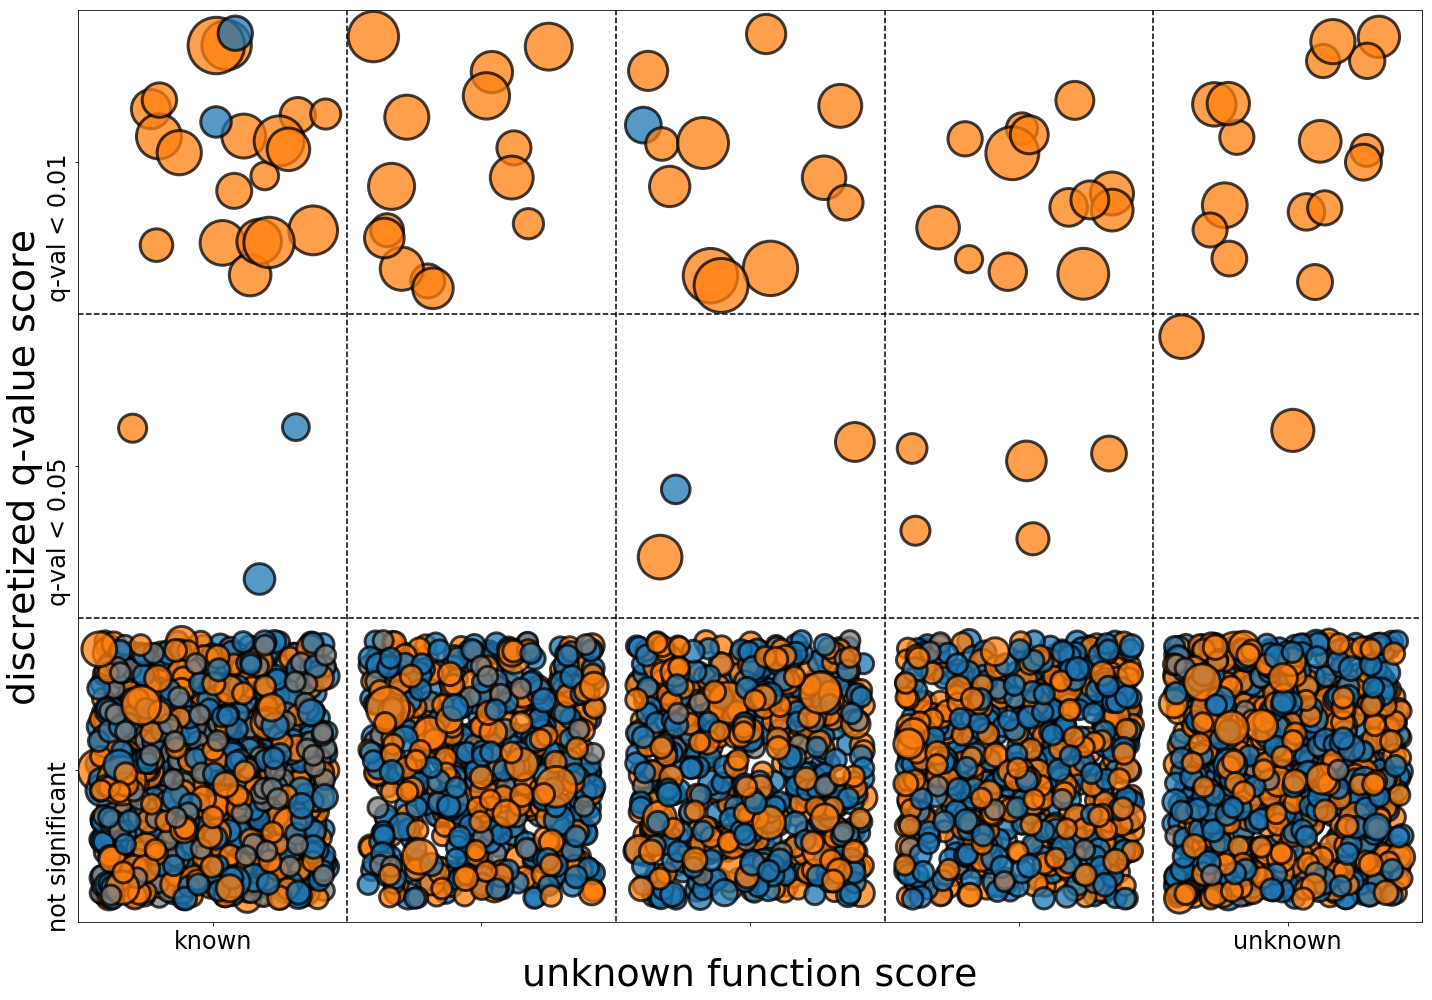

In [93]:
plt.figure(figsize = (20,14))
plt.scatter(uk_rd, q_rd, s = rad, edgecolors='k', alpha = 0.75, color = color_list, linewidths=3)
plt.xlabel('unknown function score', fontsize = 38)
plt.ylabel('discretized q-value score', fontsize = 38)
plt.xticks([0, 1, 2, 3, 4], ['known','' , '', '', 'unknown'], fontsize = 24)
plt.yticks([1, 2, 3], ['not significant' ,'q-val < 0.05', 'q-val < 0.01'], fontsize = 24, rotation = 90)

for x in np.arange(0.5, 4.5, 1):
    yvals = np.arange(0, 4, 0.01)
    xvals = len(yvals)*[x]
    plt.plot(xvals, yvals, '--', color = "k")

    
for y in np.arange(1.5, 3.5, 1):
    xvals = np.arange(-0.5, 4.5, 0.01)
    yvals = len(xvals)*[y]
    plt.plot(xvals, yvals, '--', color = "k")
    
plt.xlim(-0.5, 4.5)
plt.ylim(0.5, 3.5)


plt.tight_layout()

fig_path = '../../figures/genome_visualizations/q_discretized.png'
plt.savefig(fig_path, dpi = 150)